# Weather Application

Prediction Accuracy of Weather Data Set using Machine Learning Algorithms

Import Packages

In [2]:
#Import the libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype

from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

import statsmodels
import statsmodels.api as sm

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

np.set_printoptions(suppress=True)

In [4]:
df= pd.read_csv("seattle-weather.csv")
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [5]:
df.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather
1451,2015-12-22,4.6,7.8,2.8,5.0,rain
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


Understanding the data

In [7]:
df.shape

(1461, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [10]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [11]:
df.describe(include='object')

,date,weather
count,1461,1461
unique,1461,5
top,2012-01-01,rain
freq,1,641


In [12]:
Total = df.isnull().sum().sort_values(ascending = False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
date,0,0.0
precipitation,0,0.0
temp_max,0,0.0
temp_min,0,0.0
wind,0,0.0
weather,0,0.0


In [13]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [14]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

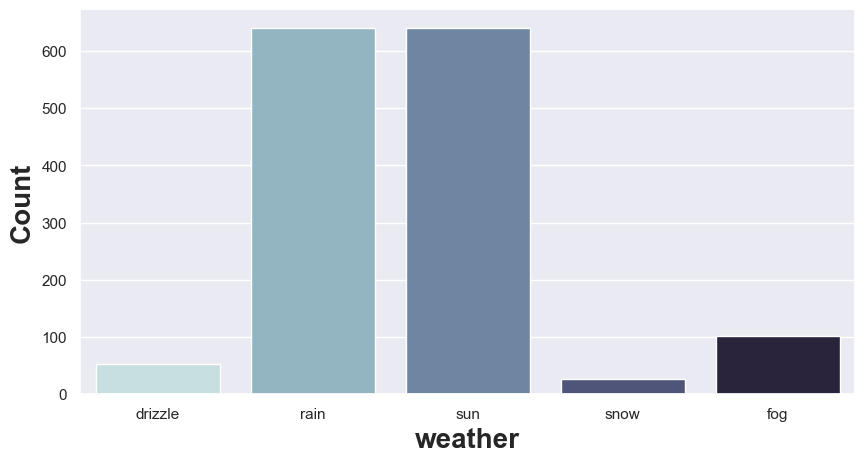

In [15]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = df,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=20)
plt.ylabel("Count",fontweight='bold',size=20)
plt.show()

In [16]:
#convert the data type into datetime
df['date'] = pd.to_datetime(df['date'])

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'precipitation'}>],
       [<AxesSubplot:title={'center':'temp_max'}>,
        <AxesSubplot:title={'center':'temp_min'}>],
       [<AxesSubplot:title={'center':'wind'}>, <AxesSubplot:>]],
      dtype=object)

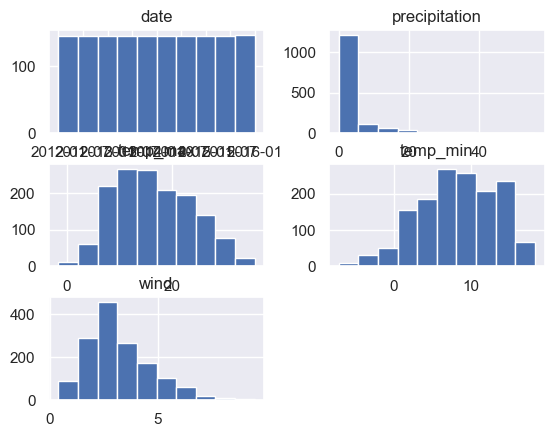

In [17]:
df.hist()

precipitation       AxesSubplot(0.125,0.53;0.352273x0.35)
temp_max         AxesSubplot(0.547727,0.53;0.352273x0.35)
temp_min            AxesSubplot(0.125,0.11;0.352273x0.35)
wind             AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

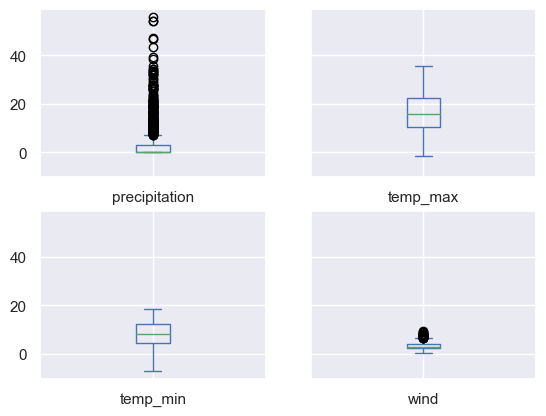

In [18]:
df.plot(kind='box', subplots=True, layout=(2, 2), sharex=True, sharey=True)

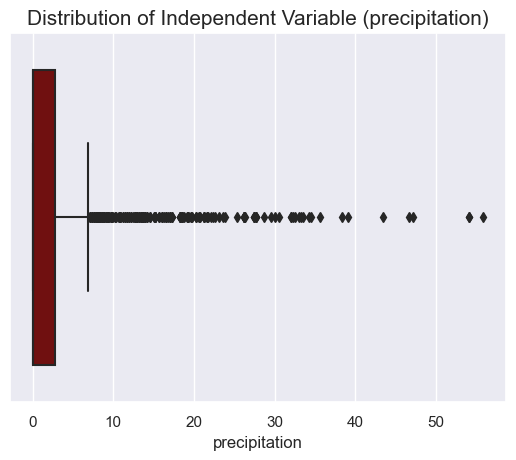

In [19]:
sns.boxplot(df['precipitation'], color='maroon')

plt.title('Distribution of Independent Variable (precipitation)', fontsize = 15)

# display the plot
plt.show()

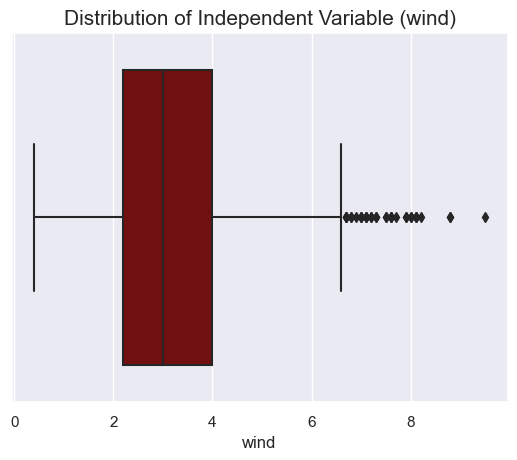

In [20]:
sns.boxplot(df['wind'], color='maroon')

plt.title('Distribution of Independent Variable (wind)', fontsize = 15)

# display the plot
plt.show()

In [21]:
df = df[df['precipitation'] < 20]

# check the dimension of the data
df.shape

(1410, 6)

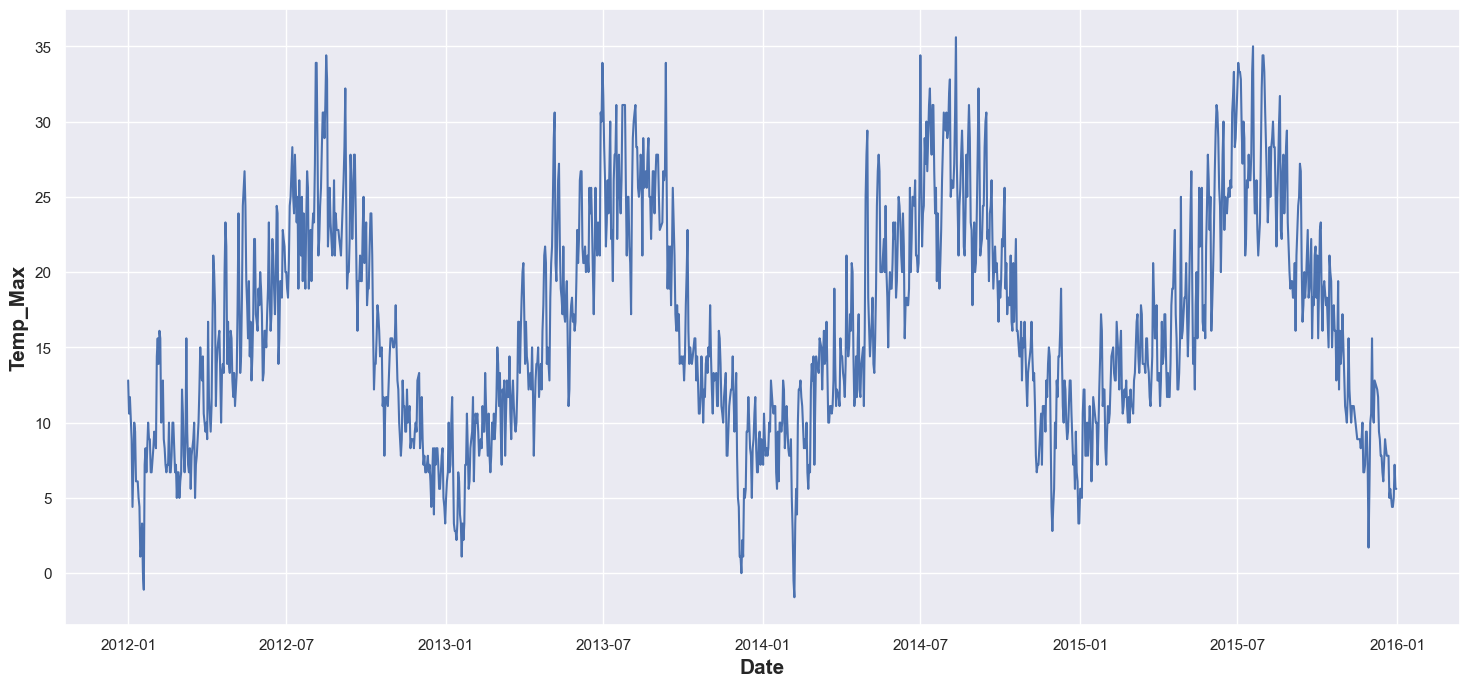

In [23]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=df)
plt.xlabel("Date",fontweight='bold',size=15)
plt.ylabel("Temp_Max",fontweight='bold',size=15)
plt.show()

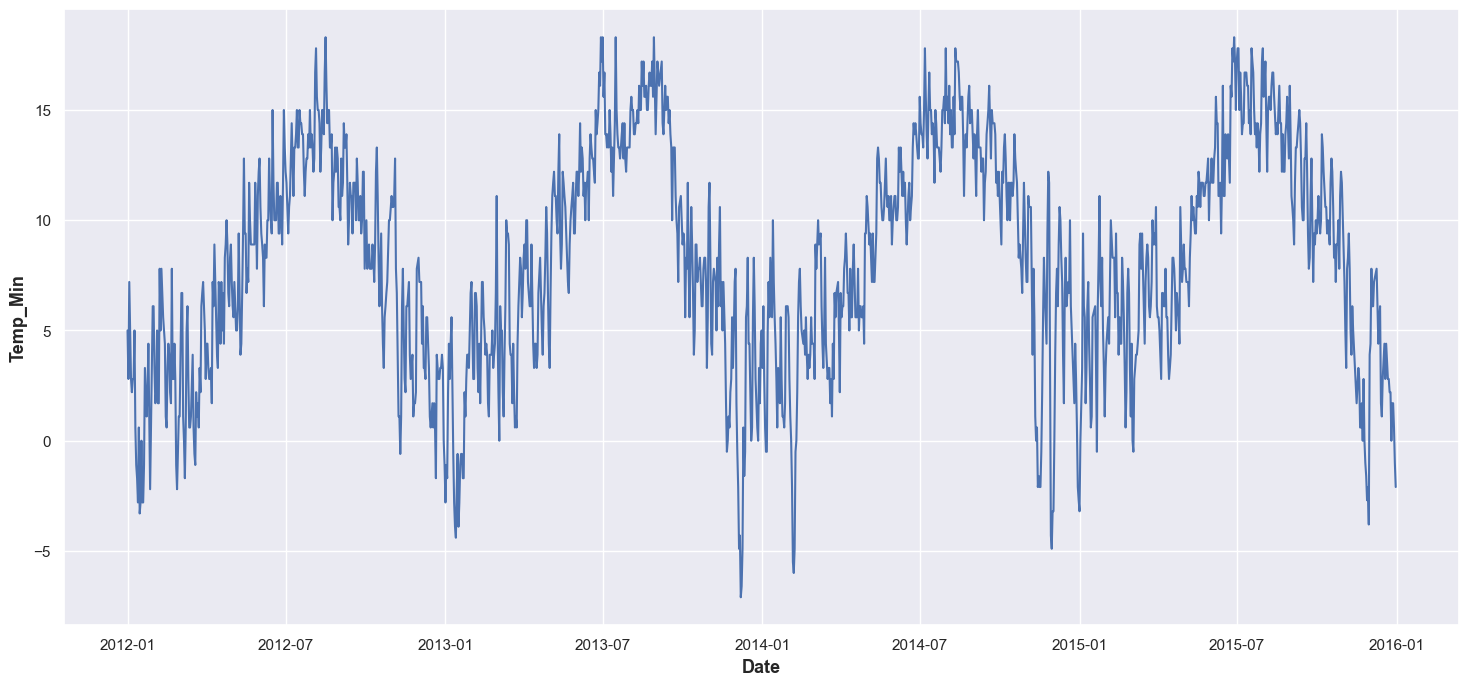

In [24]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

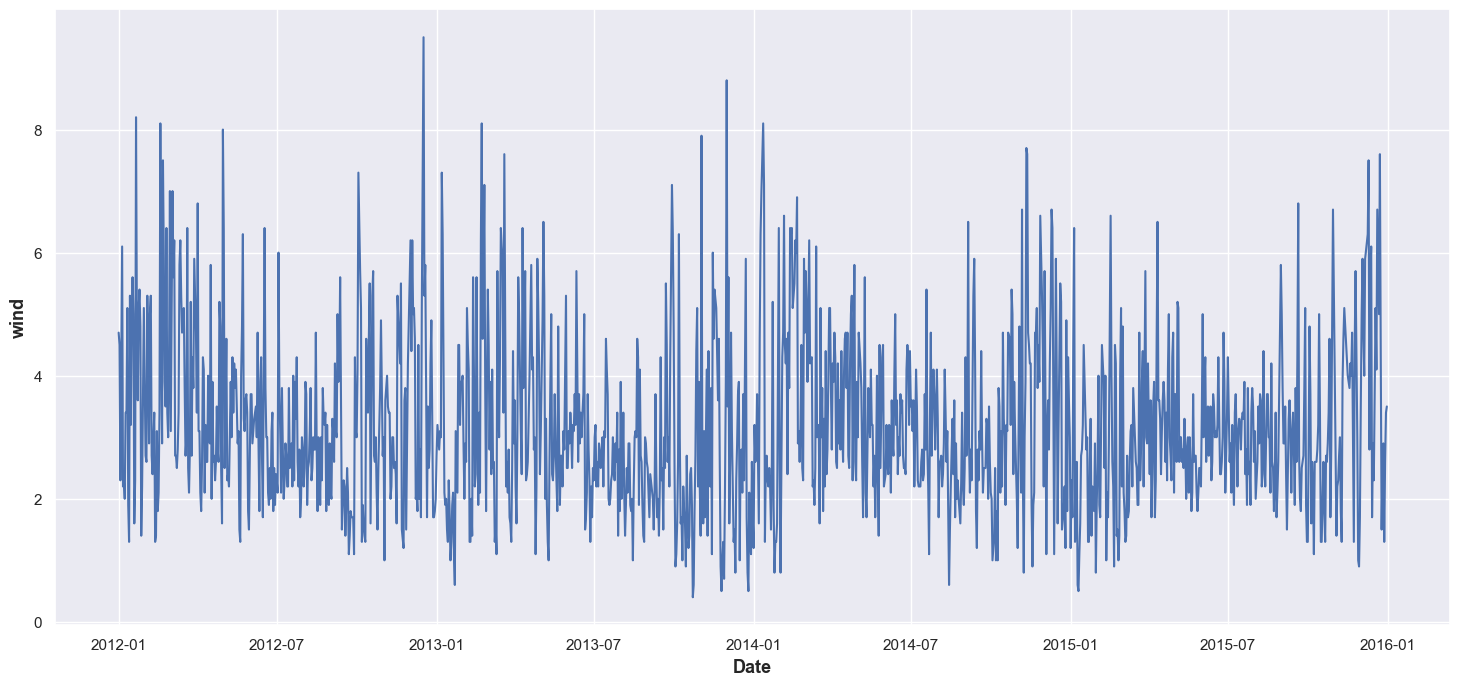

In [25]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()

<Figure size 1400x800 with 0 Axes>

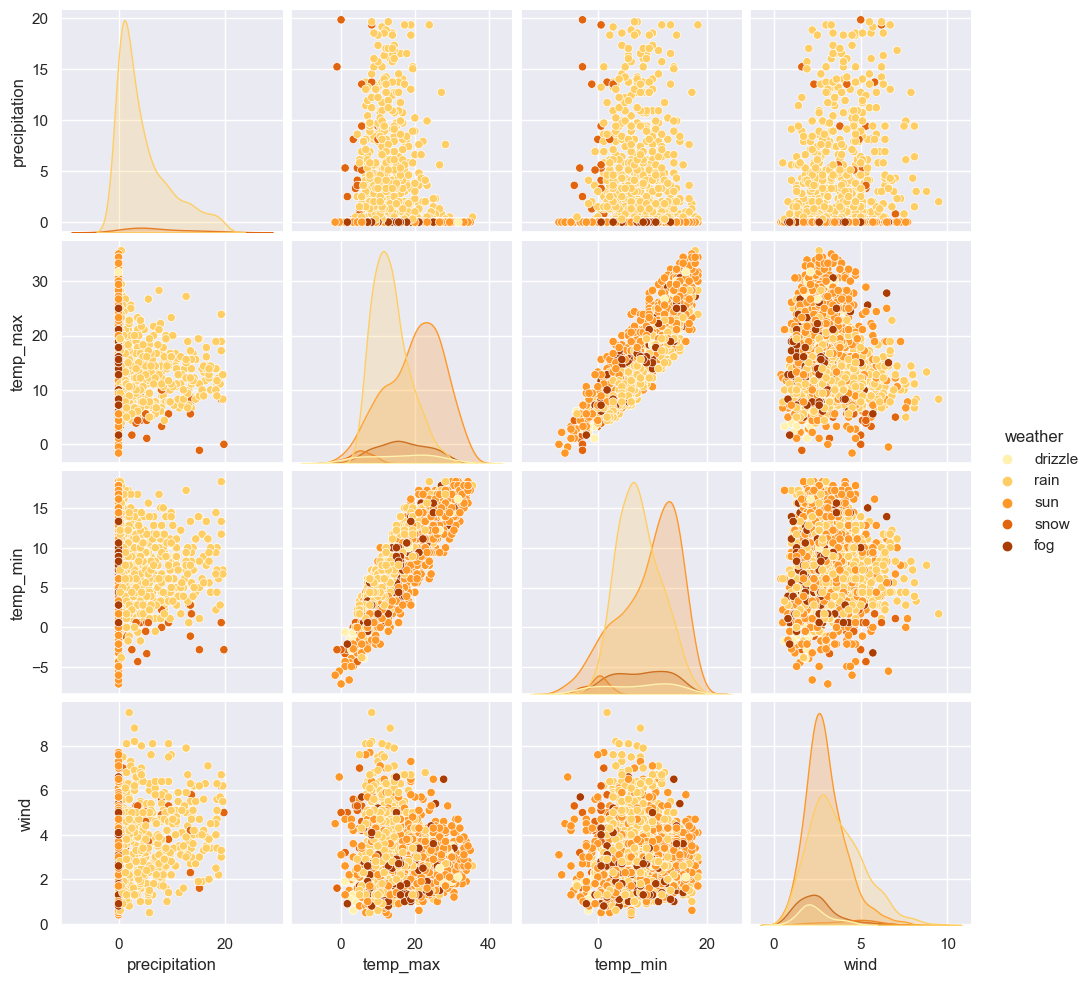

In [26]:
plt.figure(figsize=(14,8))
sns.pairplot(df.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

<Figure size 1000x500 with 0 Axes>

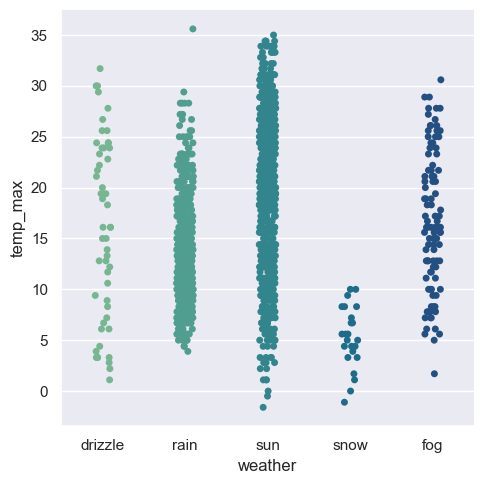

In [27]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=df,palette="crest")
plt.show()

<Figure size 1000x500 with 0 Axes>

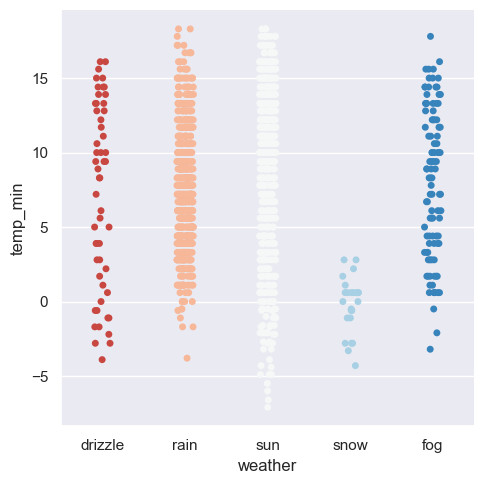

In [28]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=df,palette = "RdBu")
plt.show()

<Figure size 1000x500 with 0 Axes>

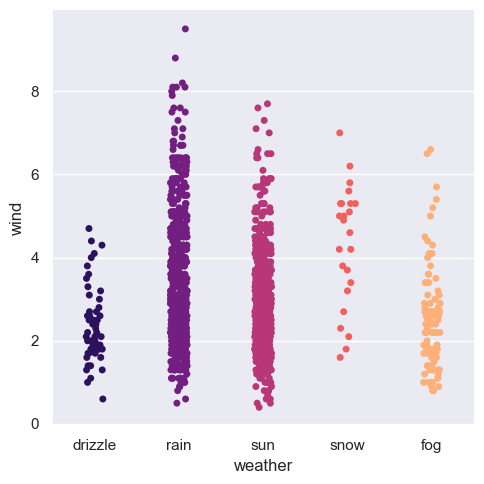

In [29]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=df,palette = "magma")
plt.show()

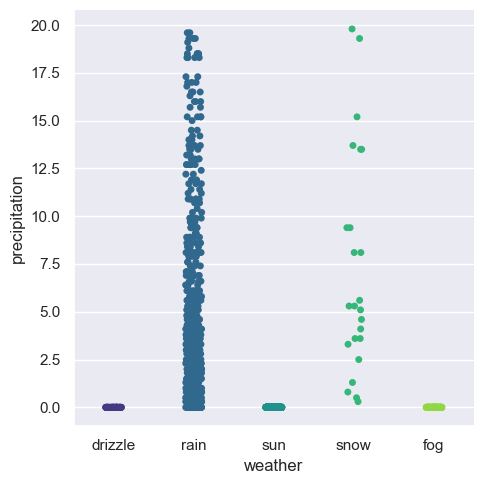

In [30]:
sns.catplot(x='weather',y ='precipitation',data=df,palette = "viridis")
plt.show()

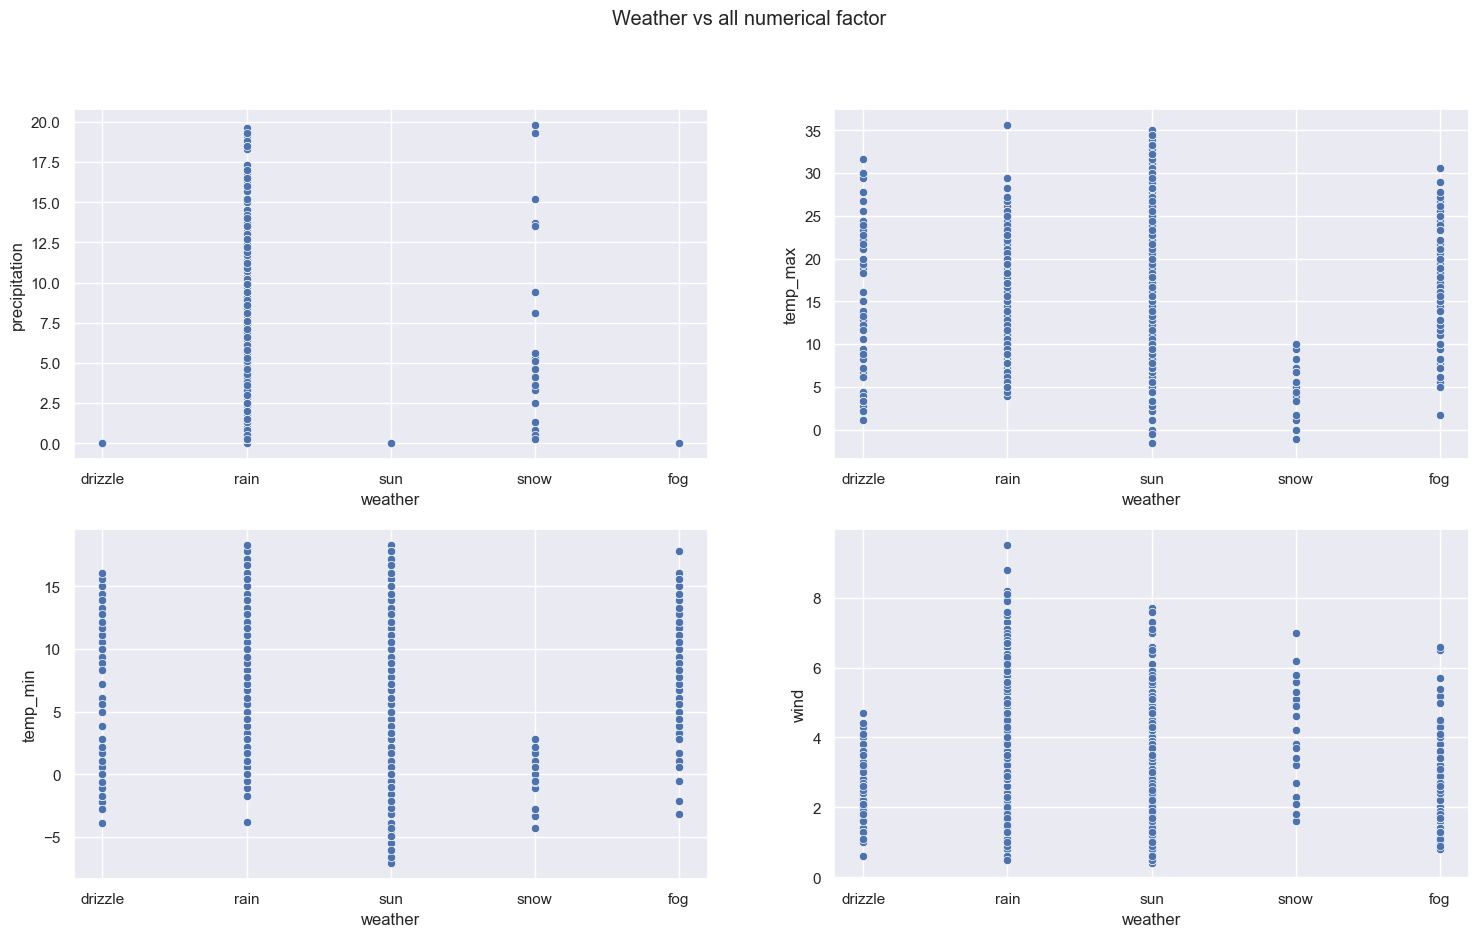

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Weather vs all numerical factor')

sns.scatterplot(ax=axes[0, 0], data=df, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=df, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=df, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=df, x='weather', y='wind')
plt.show()

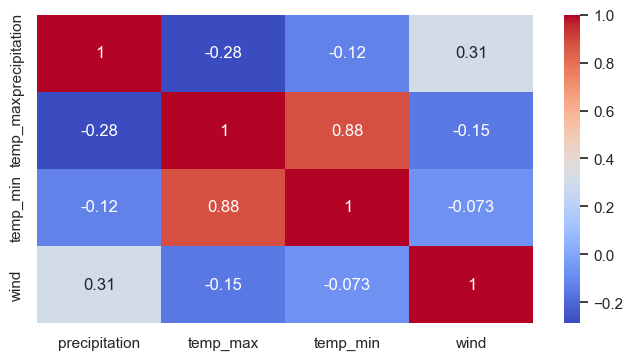

In [32]:
cor=df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [33]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()
LABEL_ENCODING("weather")
df.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
5,2012-01-06,2.5,4.4,2.2,2.2,2


In [34]:
df = df.drop('date',axis=1)

In [35]:
x = df.drop('weather',axis=1)
y = df['weather']

In [38]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=0, n=53 (3.759%)
Class=2, n=592 (41.986%)
Class=4, n=640 (45.390%)
Class=3, n=24 (1.702%)
Class=1, n=101 (7.163%)


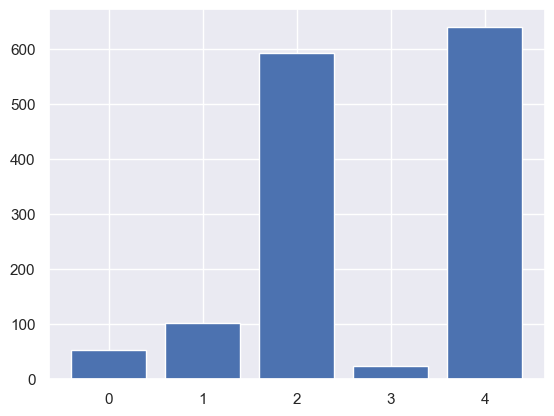

In [41]:
y = LabelEncoder().fit_transform(y)
# transform the dataset
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v/len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [43]:
print("*"*40)
print('\n')
print("Shape of x training data : ",X_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40, '\n')
print("Shape of x testing data : ",X_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************


Shape of x training data :  (1057, 4)
Shape of y training data :  (1057,)
**************************************** 

Shape of x testing data :  (353, 4)
Shape of y testing data :  (353,)
****************************************


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

In [46]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))

In [47]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    
    conf_matrix= pd.DataFrame(data= cm, columns= ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4'],
                             index= ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4'])
    sns.heatmap(conf_matrix, annot= True, fmt='d', cmap= ListedColormap(['lightskyblue']),
               cbar= False, linewidths=0.1, annot_kws={'size': 25})
    
    plt.xticks(fontsize=15, fontweight='bold')
    plt.yticks(fontsize=15, fontweight='bold')
    
    plt.show()

In [48]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    
    global score_card

    score_card = score_card.append({'Model': model_name,
                                    'Precision Score': metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'),
                                    'Recall Score': metrics.recall_score(y_test, y_pred, pos_label='positive',average='micro'),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred, pos_label='positive', average='micro')}, 
                                    ignore_index = True)
    return(score_card)


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
log_reg= classifier.fit(X_train, y_train)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
print(get_test_report(log_reg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        23
           2       0.93      0.86      0.89       152
           3       0.00      0.00      0.00         7
           4       0.73      0.97      0.84       159

    accuracy                           0.81       353
   macro avg       0.33      0.37      0.35       353
weighted avg       0.73      0.81      0.76       353



In [53]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.8101983002832861


In [54]:
kappa_score(log_reg)

0.6602892805331725

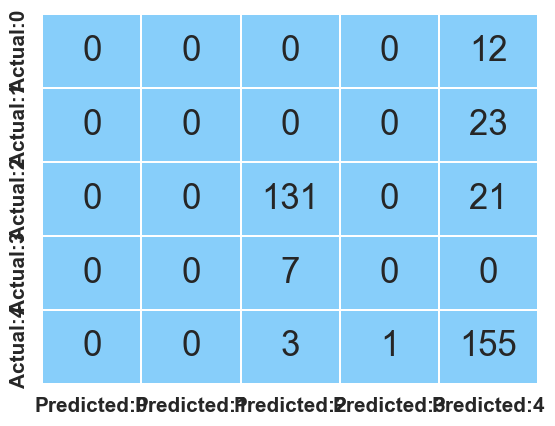

In [55]:
plot_confusion_matrix(log_reg)

In [56]:
update_score_card(model_name= 'Logistic Regression')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.810198,0.810198,0.810198,0.660289,0.810198


# Support Vector Machines (SVM)

In [58]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
SVC=classifier.fit(X_train, y_train)

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
print(get_test_report(SVC))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        23
           2       0.96      0.86      0.91       152
           3       0.00      0.00      0.00         7
           4       0.74      1.00      0.85       159

    accuracy                           0.82       353
   macro avg       0.34      0.37      0.35       353
weighted avg       0.74      0.82      0.77       353



In [61]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.8215297450424929


In [62]:
kappa_score(SVC)

0.6803685125831813

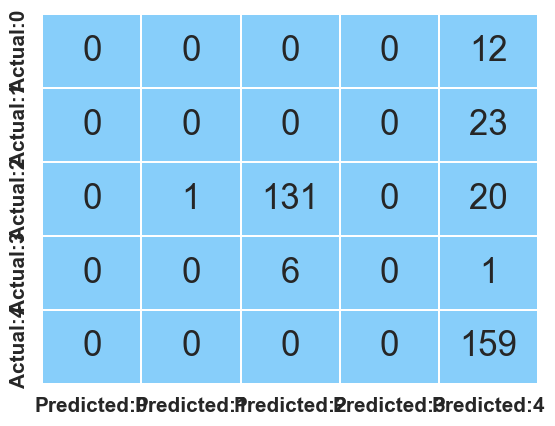

In [63]:
plot_confusion_matrix(SVC)

In [64]:
update_score_card(model_name='SVC')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.810198,0.810198,0.810198,0.660289,0.810198
1,SVC,0.821530,0.821530,0.821530,0.680369,0.821530


# Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
GNB=classifier.fit(X_train, y_train)

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
print(get_test_report(GNB))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        23
           2       0.99      0.94      0.97       152
           3       1.00      0.86      0.92         7
           4       0.78      1.00      0.88       159

    accuracy                           0.87       353
   macro avg       0.56      0.56      0.55       353
weighted avg       0.80      0.87      0.83       353



In [69]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8725212464589235


In [70]:
kappa_score(GNB)

0.7743672054771171

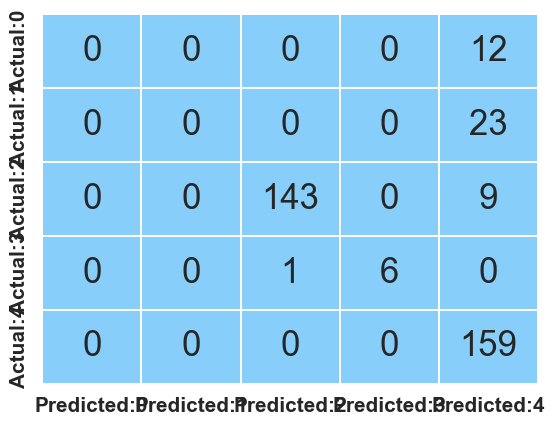

In [71]:
plot_confusion_matrix(GNB)

In [75]:
update_score_card(model_name= 'Naive Bayes')

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.810198,0.810198,0.810198,0.660289,0.810198
1,SVC,0.821530,0.821530,0.821530,0.680369,0.821530
2,Naive Bayes,0.872521,0.872521,0.872521,0.774367,0.872521
3,Naive Bayes,0.872521,0.872521,0.872521,0.774367,0.872521
